In [1]:
# import libraries for time-series analysis
import os
import numpy as np
import pandas as pd
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
from matplotlib import cm
from pandas import read_csv, set_option

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost
from xgboost import plot_importance, XGBClassifier, XGBRegressor
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import shap

from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from tqdm.autonotebook import tqdm
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.decomposition import FastICA
from sklearn.manifold import Isomap
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

import time
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
%matplotlib inline

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import datetime

In [3]:
# define time conversion custom function for timestamps in string format -> native timestamps in the csv file
def datetime_parser(timestamp_str):
    return datetime.datetime.strptime(timestamp_str, "%Y-%m-%d %H:%M:%S%z")

# define path for train_df1 dataset
path = './data/train_df1.csv'

# for time series data, the datetime is always the index
train_df1 = pd.read_csv(path,
                        parse_dates=[0], # to be decided later
                        date_parser = datetime_parser,
                        index_col = 'Timestamp')    

train_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 841472 entries, 2018-09-14 13:21:00+00:00 to 2020-04-20 21:52:00+00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Open               841472 non-null  float64
 1   High               841472 non-null  float64
 2   Low                841472 non-null  float64
 3   Close              841472 non-null  float64
 4   Volume_(BTC)       841472 non-null  float64
 5   Volume_(Currency)  841472 non-null  float64
 6   Weighted_Price     841472 non-null  float64
 7   SMA                841472 non-null  float64
 8   LMA                841472 non-null  float64
 9   Signal             841472 non-null  float64
dtypes: float64(10)
memory usage: 70.6 MB


In [4]:
# import the test_df1 csv file 
path = './data/test_df1.csv'

# for time series data, the datetime is always the index
test_df1 = pd.read_csv(path,
                       parse_dates=[0], # to be decided later
                       date_parser = datetime_parser,
                       index_col = 'Timestamp')    

test_df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210368 entries, 2020-04-20 21:53:00+00:00 to 2020-09-14 00:00:00+00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Open               210368 non-null  float64
 1   High               210368 non-null  float64
 2   Low                210368 non-null  float64
 3   Close              210368 non-null  float64
 4   Volume_(BTC)       210368 non-null  float64
 5   Volume_(Currency)  210368 non-null  float64
 6   Weighted_Price     210368 non-null  float64
 7   SMA                210368 non-null  float64
 8   LMA                210368 non-null  float64
 9   Signal             210368 non-null  float64
dtypes: float64(10)
memory usage: 17.7 MB


In [5]:
# import the train_df2 csv file 
path = './data/train_df2.csv'

# for time series data, the datetime is always the index
train_df2 = pd.read_csv(path,
                        parse_dates=[0], # to be decided later
                        date_parser = datetime_parser,
                        index_col = 'Timestamp')   

train_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 839478 entries, 2018-09-14 16:42:00+00:00 to 2020-04-20 21:52:00+00:00
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Close           839478 non-null  float64
 1   Volume_(BTC)    839478 non-null  float64
 2   Weighted_Price  839478 non-null  float64
 3   Signal          839478 non-null  float64
 4   MA21            839478 non-null  float64
 5   MA63            839478 non-null  float64
 6   MA252           839478 non-null  float64
 7   EMA10           839478 non-null  float64
 8   EMA30           839478 non-null  float64
 9   EMA200          839478 non-null  float64
 10  MOM10           839478 non-null  float64
 11  MOM30           839478 non-null  float64
 12  RSI10           839478 non-null  float64
 13  RSI30           839478 non-null  float64
 14  RSI200          839478 non-null  float64
 15  %K10            839478 non-null  float64
 16  %K30      

In [6]:
# import the test_df2 csv file 
path = './data/test_df2.csv'

# for time series data, the datetime is always the index
test_df2 = pd.read_csv(path,
                       parse_dates=[0], # to be decided later
                       date_parser = datetime_parser,
                       index_col = 'Timestamp')    


test_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210145 entries, 2020-04-21 01:14:00+00:00 to 2020-09-14 00:00:00+00:00
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Close           210145 non-null  float64
 1   Volume_(BTC)    210145 non-null  float64
 2   Weighted_Price  210145 non-null  float64
 3   Signal          210145 non-null  float64
 4   MA21            210145 non-null  float64
 5   MA63            210145 non-null  float64
 6   MA252           210145 non-null  float64
 7   EMA10           210145 non-null  float64
 8   EMA30           210145 non-null  float64
 9   EMA200          210145 non-null  float64
 10  MOM10           210145 non-null  float64
 11  MOM30           210145 non-null  float64
 12  RSI10           210145 non-null  float64
 13  RSI30           210145 non-null  float64
 14  RSI200          210145 non-null  float64
 15  %K10            210145 non-null  float64
 16  %K30      

### 4. Model Generation and Evaluation of Baseline Models

#### Existing Datasets
* train_df1 / test_df1 : `train and test dataframes with baseline features associated with the asset`
<br>
* train_df2 / test_df2 : `train and test dataframes with engineered features associated with the asset`


#### Algorithms to be trained and used to predict target variable `Signal` (Market Directivity)
(1) Lightweight Models
- Supervised-Learning Models : `DecisionTreeClassifier`
<br>
- Unsupervised-Learning Models : `LinearDiscriminantAnalysis`, `KNeighboursClassifier`, and `GaussianNB`
<br>

(2) Advanced Models (Tree-based Models)
- Bagging Algorithm (Ensemble Learning Method / BootStrap Aggregation) : `RandomForestClassifier`
<br> 
- Boosting Algorithm : `GradientBoostingClassifier`, `XGBClassifier`, and `CatBoostClassifier`
<br> 

#### Customize `eval_fxn` to evaluate how each model performs on different (i) `data split percentages` and (ii) `evaluation` approaches

Approach #1 <br>
(1) The function takes in a `dataframe` which contains both the `feature matrix, X` & `target variable, y`
<br>
(2) The data is split into two parts; `train_df` & `eval_df`
<br>
(3) A 5-fold `cross validation` evaluation of the imported dataframe is evaluated to get a picture of how well the model performs on the training data
<br>
(4) A standard Two-Way Split (without data shuffling as the sequence is important for time-series data) is made, and trained on `X_train` / `y_train` & `X_eval` / `y_eval`

In [7]:
models = []
# initialize lightweight models
## unsupervised-learning models
models.append(('LDA', LinearDiscriminantAnalysis()))  
models.append(('KNN', KNeighborsClassifier()))  
models.append(('NB', GaussianNB()))
## supervised-learning model
models.append(('TREE', DecisionTreeClassifier())) 

# initialize advanced models
## boosting algorithm, supervised-learning models
models.append(('GBM', GradientBoostingClassifier(n_estimators=25)))
models.append(('XGB',XGBClassifier(n_estimators=25,
                                   eval_metric='logloss')))
models.append(('CAT',CatBoostClassifier(silent=True,
                                        n_estimators=25)))
## bagging algorithm, supervised-learning models
models.append(('RF', RandomForestClassifier(n_estimators=25)))

In [8]:
# customized evaluation function

def eval_model(ldf, 
               feature='Signal',
               split_id=[None, None],
               eval_id=[True, True, True, True],
               test_id='',
               n_fold=5,
               scoring='accuracy',
               plot_id='',
               cv_yrange=None,
               hm_vvals=[0.5, 1.0, 0.75]):
    
    ''' Print all adjustable parameters out '''
    # eval_id (T/F) : [CV, Train, Test, All]
    # split_id : Train/Eval split [%, timestamp], whichever is not None
    # test_id : Evaluate trained model on test set only

    print('Evaluation Function')
    print(f'Cross Validation Activated, n_splits : {n_fold}, scoring metric : {scoring}')
    if (eval_id[2]):
        if(split_id[0] is not None):
            print(f'Train/Evaluation Set Split Activated : {split_id[0]}')
        if(split_id[1] is not None): 
            print(f'Train/Evaluation Set Split Activated : {split_id[1]}')
            
    ''' 1. Split train_df2 into training and evaluation sets '''
    if (split_id[0] is not None):
        # generic percentage split, non-shuffle required for time-series
        train_df, eval_df = train_test_split(ldf, 
                                             test_size=split_id[0],
                                             shuffle=False)
    
    elif (split_id[1] is not None):
        # specific time split
        train_df = ldf.loc[:split_id[1]]
        eval_df = ldf.loc[split_id[1]:]
        
    else:
        print ("Choose one splitting method only.")
            
    ''' 2. Split the dataframes into feature matrix and target variable  '''
    
    X_train = train_df.loc[:, train_df.columns!=feature]
    y_train = train_df[feature]
    X_eval = eval_df.loc[:, eval_df.columns!=feature]
    y_eval = eval_df[feature]
    
    # concatenate X,feature matrix for train and evaluation sets
    X_concat = pd.concat([X_train, X_eval], axis=0)
    # concatenate y,target variable for train and evaluation sets
    y_concat = pd.concat([y_train, y_eval], axis=0)
    
    # print the concatenated X,feature matrix and y,target variable
    print('')
    print(f'Using Features: {X_train.columns}')
    print(f'Target Variable: {feature}')
    print('')
    
    ''' 3. Visualize the Training (and Evaluation) / Test data '''
    if (plot_id[0]):
        # plot the training data irregardless
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=train_df.index,
                                 y=train_df['Signal'],
                                 mode=lines,
                                 name='Training Data',
                                 line={'width' : 0.25}))
        fig.update_layout(height=300,
                          width=800,
                          template='plotly_white',
                          title='Training Signal Visualisation',
                          margin=dict(l=50,
                                      r=80,
                                      t=50,
                                      b=40))
        
        # plot the test data if eval_id test argument is set to 'True'
        if (eval_id[2]):
            fig.add_trace(go.Scatter(x=eval_df.index,
                                     y=eval_df['Signal'], 
                                     mode=lines, 
                                     name='Evaluation Data', 
                                     line={'width' : 0.25}))
            fig.update_layout(title='Training / Evaluation Signal Visualisation')
            
        fig.show()
        
    ''' 4. Perform Cross Validation on Training / Evaluation data '''
    
    names = []
    lst_res = []
    lst_train = [] 
    lst_eval = [] 
    lst_one = [] 
    lst_res_mean = []
        
    if (any(eval_id)):
        for name, model in models:  # cycle through models & evaluate either cv or train/test
            names.append(name)
            
            # apply cross validation model on training dataset
            if(eval_id[0]):
                t0=time.time()
                kfold = KFold(n_splits=n_fold)
                cv_res = cross_val_score(model,
                                         X_train,
                                         y_train, 
                                         cv=kfold, 
                                         scoring=scoring)
                t1 = time.time()
                lst_res.append(cv_res)
                tt1 = t1-t0 # total time for n_fold cross evaluation
                
            # evaluate fitted model on training data
            t2 = time.time()
            
            if(eval_id[1]):
                t2 = time.time()
                res = model.fit(X_train,
                                y_train)
                train_res = accuracy_score(res.predict(X_train),
                                           y_train) 
                lst_train.append(train_res)
                
            if(eval_id[2]):
                if(eval_id[1] is False):  # if training hasn't been called yet
                    res = model.fit(X_train,y_train)
                eval_res = accuracy_score(res.predict(X_eval),
                                          y_eval) 
                lst_eval.append(eval_res)
            t3 = time.time()
            tt2 = t3-t2 # total time for training/evaluation train/prediction
            
            # evaluate model on entire dataset
            if(eval_id[3]):
                t4 = time.time()
                res = model.fit(X_concat,y_concat)
                one_res = accuracy_score(res.predict(X_concat),y_concat)
                lst_one.append(one_res)
                t5 = time.time()
                tt3 = t5-t4 # total time for training & evaluation on whole dataframe
            
            ''' Quantitative Performance of each segment '''
            # evaluation of cross validation / training / evaluation models - and the time taken to train and evaluated the performance of each datasets
            lst_res_mean.append(cv_res.mean())
            fn1 = cv_res.mean()
            fn2 = cv_res.std()
            fn3 = train_res
            fn4 = eval_res
            fn5 = one_res
            print(f"{name} : {fn1:.3f}({fn2:.3f}) -> {tt1:.2f}s | {fn3:.3f} & {fn4:.3f} -> {tt2:.2f}s | {fn5:.3f} -> {tt3:.2}s")
      
    s0 = pd.Series(np.array(lst_res_mean),index=names)
    s1 = pd.Series(np.array(lst_train),index=names)
    s2 = pd.Series(np.array(lst_eval),index=names)
    s3 = pd.Series(np.array(lst_one),index=names)
    pdf = pd.concat([s0,s1,s2,s3],axis=1)
    pdf.columns = ['cv_average','train','test','all']
    s4 = pd.Series([tt1,tt2,tt3],index=['cv','train/test','all'])
        
    ''' 5. Visualize Model Performance '''
    if(plot_id[1]): 
        
        sns.set(style="whitegrid")
        fig,ax = plt.subplots(1,
                              2,
                              figsize=(15,4))
        ax[0].set_title(f'{n_fold} Cross Validation Results')
        sns.boxplot(data=lst_res, 
                    ax=ax[0], 
                    orient="v",
                    width=0.3)
        ax[0].set_xticklabels(names)
        sns.stripplot(data=lst_res,
                      ax=ax[0], 
                      orient='v',
                      color=".3",
                      linewidth=1)
        ax[0].set_xticklabels(names)
        ax[0].xaxis.grid(True)
        ax[0].set(xlabel="")
        if(cv_yrange is not None):
            ax[0].set_ylim(cv_yrange)
        sns.despine(trim=True, 
                    left=True)
    
        sns.heatmap(pdf,
                    vmin=hm_vvals[0],
                    vmax=hm_vvals[1],
                    center=hm_vvals[2],
                    ax=ax[1],
                    square=False,
                    lw=2,
                    annot=True,
                    fmt='.3f',
                    cmap='Blues')
        ax[1].set_title('Accuracy Scores')
        plt.show()


#### 4.1 Model Evaluation of Baseline Features
* Baseline Features `Open`, `High`, `Low`, `Close`, `Volume_(BTC)`, `Volume_(Currency)`, and `Weighted_Price` 

Evaluation Function
Cross Validation Activated, n_splits : 5, scoring metric : accuracy
Train/Evaluation Set Split Activated : 0.2

Using Features: Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price', 'SMA', 'LMA'],
      dtype='object')
Target Variable: Signal

LDA : 0.932(0.076) -> 4.43s | 0.941 & 0.978 -> 1.12s | 0.951 -> 1.4s
KNN : 0.513(0.006) -> 38.11s | 0.748 & 0.559 -> 44.92s | 0.754 -> 4.7e+01s
NB : 0.507(0.010) -> 1.48s | 0.506 & 0.511 -> 0.61s | 0.508 -> 0.66s
TREE : 0.714(0.093) -> 714.75s | 1.000 & 0.924 -> 264.86s | 1.000 -> 5.3e+02s
GBM : 0.510(0.012) -> 360.40s | 0.538 & 0.522 -> 105.22s | 0.535 -> 1.2e+02s
XGB : 0.515(0.012) -> 4.81s | 0.611 & 0.544 -> 1.54s | 0.597 -> 1.9s
CAT : 0.507(0.011) -> 5.55s | 0.565 & 0.525 -> 1.71s | 0.561 -> 1.8s
RF : 0.701(0.087) -> 756.35s | 1.000 & 0.896 -> 174.97s | 1.000 -> 2.3e+02s


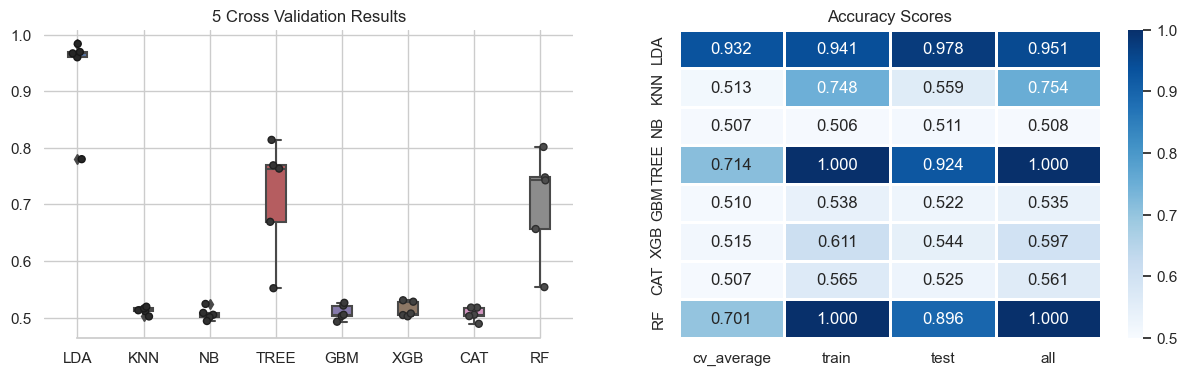

In [9]:
eval_model(train_df1,
           split_id=[0.2,None],
           plot_id=[False,True])


In terms of Model Performance: <br>
* `Linear Discriminant Analysis (LDA)`, `Decision Tree Classifiers`, and `Random Forest Classifier` yielded high cross validation and accuracy scores than the other machine learning models. This is despite the small number of significant estimators. 
<br> 
* Most models had higher accuracy scores than cross validation scores - this is expected. Cross validation provides a more robust / realistic estimate of model performance across different data splits. Evaluating a model on a single dataset (e.g., test set) may not be the best approach if you would like to avoid overfitting. 
<br> 
* Cross validation and accuracy scores for most models are hovering above 0.5. This suggests that using only baseline features associated with one single asset is not quite adequate for the prediction of asset directivity. 
<br> 
* Model Selection : The data suggests that certain tree-based models (`DecisionTreeClassifier` and `RandomForestClassifier` and the `linear discriminant analysis (LDA)` model might be best suited for the task of predicting asset directivity using time-series data. 

In terms of Computational Efficiency: <br> 
* The tree-based models (i.e., `DecisionTreeClassifier`, `RandomForestClassifier` and the `GradientBoostingClassifier`) are time-intensive to train and run for only 7 features. This went against my expectations as `DecisionTreeClassifier` required significant training time despite it being a lightweight model. More advanced models (i.e., `RandomForestClassifier`, `GradientBosstingClassifier`) have to be tuned down significantly to reduce the training time to comparable levels, therefore it's desirable to optimise the feature selection process.
<br>
* `XGB` & `CATBoost`, surprising were quite quick for quite advanced model, indicating it's quite well optimised for being used right from the get go.
<br>
* `RandomForestClassifier` takes much longer than `XGB` to train despite it being a model with a similar algorithm.
<br>


#### 4.2 Model Evaluation of Transformed Features
* Transformed Features `Close`, `Volume_(BTC)`, `Weighted_Price`, `Moving Averages (Window: 21, 63, 252)`, `Exponential Moving Averages (Window: 10, 30, 200)`, `Momentum (Window: 10, 30)`, `Relative Strength Index (Window: 10, 30, 200)`, `Stochastic Oscilliators (Slow) - %K10, %K30, %K200`, `Stochastic Oscilliators (Fast) - %D10, %D30, %D200`

In [10]:
# remove KNN model from the `model` list as KNN is not inherently optimal for sparse data / sparse feature matrices 
# too computationally intensive and inefficient
models = [model for model in models if model[0] != 'KNN']

Evaluation Function
Cross Validation Activated, n_splits : 5, scoring metric : accuracy
Train/Evaluation Set Split Activated : 0.2

Using Features: Index(['Close', 'Volume_(BTC)', 'Weighted_Price', 'MA21', 'MA63', 'MA252',
       'EMA10', 'EMA30', 'EMA200', 'MOM10', 'MOM30', 'RSI10', 'RSI30',
       'RSI200', '%K10', '%K30', '%K200', '%D10', '%D30', '%D200'],
      dtype='object')
Target Variable: Signal

LDA : 0.865(0.014) -> 9.43s | 0.866 & 0.882 -> 2.15s | 0.869 -> 2.8s
NB : 0.723(0.010) -> 2.06s | 0.723 & 0.729 -> 0.75s | 0.724 -> 1.0s
TREE : 0.822(0.019) -> 114.08s | 1.000 & 0.844 -> 32.02s | 1.000 -> 4.4e+01s
GBM : 0.851(0.005) -> 682.59s | 0.853 & 0.854 -> 207.47s | 0.855 -> 2.9e+02s
XGB : 0.885(0.007) -> 9.36s | 0.890 & 0.893 -> 2.32s | 0.891 -> 2.8s
CAT : 0.880(0.007) -> 10.60s | 0.883 & 0.889 -> 2.84s | 0.884 -> 3.8s
RF : 0.874(0.007) -> 613.54s | 0.999 & 0.886 -> 167.03s | 0.999 -> 2.2e+02s


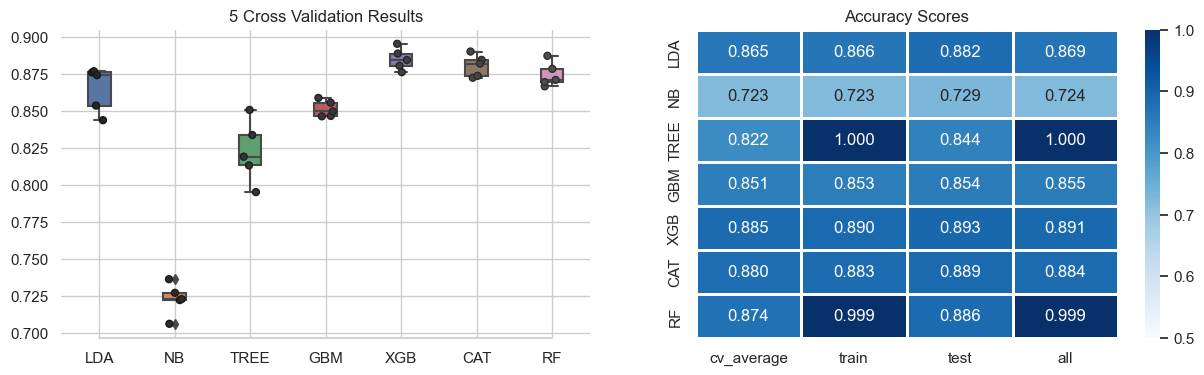

In [11]:
eval_model(train_df2,
           split_id=[0.2, None],
           plot_id=[False, True])  

* We removed the `KNN` distance-based model as it is not friendly to sparse feature matrices. Other models with sparse-aware algorithms might handle sparse data more effectively (i.e., tree-based models, linear models). KNN relies heavily on computing distance between data points. Sparse matrices where most elements are zero can lead to misleading distance calculations. More specifically, the distance between two sparse vectors often becomes dominated by the presence or absence of non-zero elements rather than the actual values of the features
<br>
* `GuassianNB` unsupervised model did not perform well as compared to the other supervised-learning models.
<br> 
* `LDA` (light-weight linear-based model), and the following `GBM`, `XGB`, `CAT`, `RF` (more advanced models) performed well. 
<br>
* Taking into account both performance (CV_score and Accuracy) and time, `LDA`, `XGB`, and `CAT` are the better performing models. It is also relatively faster to train these models, making them the more efficient approaches for large datasets.
<br>
* Overall, the same algorithms trained on the engineered features created better performing models that predicted asset directivity more accurately / precisely when given unseen data.